**Procesamiento Natural del Lenguaje**
**Interpretaci√≥n Cien A√±os de Soledad**

---

*   DAVID ORLANDO TIMANA LEYTON

Especializaci√≥n en Inteligencia Artificial

Universitaria Minuto de Dios

NRC 3665 - Procesamiento Natural del lenguaje - Semana 3

Mg. Sergio Arley Puerto

15 de Septiembre de 2025

In [1]:
import nltk
# Descargar los datos necesarios para el procesamiento
nltk.download('punkt')
nltk.download('punkt_tab')  # Versi√≥n m√°s reciente del tokenizador
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/davidtimana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/davidtimana/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davidtimana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/davidtimana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/davidtimana/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
from bs4 import BeautifulSoup
import urllib.request

# Obtener el contenido de la p√°gina web
try:
    with urllib.request.urlopen('https://www.culturagenial.com/es/cien-anos-de-soledad-de-gabriel-garcia-marquez/') as response:
        html = response.read()
    
    # Parsear el HTML con html5lib (m√°s tolerante a HTML mal formado)
    soup = BeautifulSoup(html, "html5lib")
    
    # Extraer solo el texto, eliminando scripts, estilos, etc.
    for script in soup(["script", "style", "nav", "footer", "header"]):
        script.decompose()
    
    text = soup.get_text(strip=True)
    print(f"Texto extra√≠do: {len(text)} caracteres")
    print(f"Primeros 200 caracteres: {text[:200]}...")
    
except Exception as e:
    print(f"Error al obtener la p√°gina web: {e}")
    # Texto de ejemplo para continuar con el an√°lisis
    text = """
    Cien a√±os de soledad es una novela del escritor colombiano Gabriel Garc√≠a M√°rquez, 
    ganador del Premio Nobel de Literatura en 1982. La obra fue publicada por primera vez 
    en Buenos Aires en mayo de 1967 por la editorial Sudamericana. Es considerada una 
    obra maestra de la literatura hispanoamericana y universal, as√≠ como una de las obras 
    m√°s traducidas y le√≠das en espa√±ol.
    """
    print("Usando texto de ejemplo para continuar con el an√°lisis...")

Texto extra√≠do: 14189 caracteres
Primeros 200 caracteres: Cien a√±os de soledad de Garc√≠a M√°rquez: resumen y an√°lisis - Cultura GenialCultura GenialLiteraturaCien a√±os de soledadse ha convertido en la novela m√°s emblem√°tica de la literatura latinoamericana. E...


In [3]:
#tokens
from nltk.tokenize import word_tokenize

# Tokenizar el texto especificando espa√±ol como idioma
tokens = word_tokenize(text, language='spanish')  # Especificar espa√±ol
print(f"Total de tokens iniciales: {len(tokens)}")

# Filtrar solo palabras alfab√©ticas y convertir a min√∫sculas
tokens = [word.lower() for word in tokens if word.isalpha()]
print(f"Tokens despu√©s del filtrado: {len(tokens)}")
print(f"Primeros 20 tokens: {tokens[:20]}")
print(f"√öltimos 20 tokens: {tokens[-20:]}")

Total de tokens iniciales: 2439
Tokens despu√©s del filtrado: 2099
Primeros 20 tokens: ['cien', 'a√±os', 'de', 'soledad', 'de', 'garc√≠a', 'm√°rquez', 'resumen', 'y', 'an√°lisis', 'cultura', 'genialcultura', 'genialliteraturacien', 'a√±os', 'de', 'soledadse', 'ha', 'convertido', 'en', 'la']
√öltimos 20 tokens: ['de', 'enriquecer', 'la', 'experiencia', 'de', 'apreciar', 'm√∫sica', 'literatura', 'poes√≠a', 'teatro', 'cine', 'pintura', 'escultura', 'arquitectura', 'y', 'm√°s√∫ltimas', 'novedadespopularescontactoprivacidadt√©rminos', 'de', 'usosobre', 'citar']


=== AN√ÅLISIS DE FRECUENCIA DE PALABRAS ===
Total de palabras √∫nicas: 826
Total de palabras: 2099

--- Top 20 palabras m√°s frecuentes ---
de: 163
y: 85
la: 84
el: 63
en: 54
a: 45
del: 37
que: 36
un: 31
se: 30
los: 30
una: 23
su: 22
a√±os: 19
por: 19
resumen: 17
garc√≠a: 16
con: 16
lo: 14
es: 13


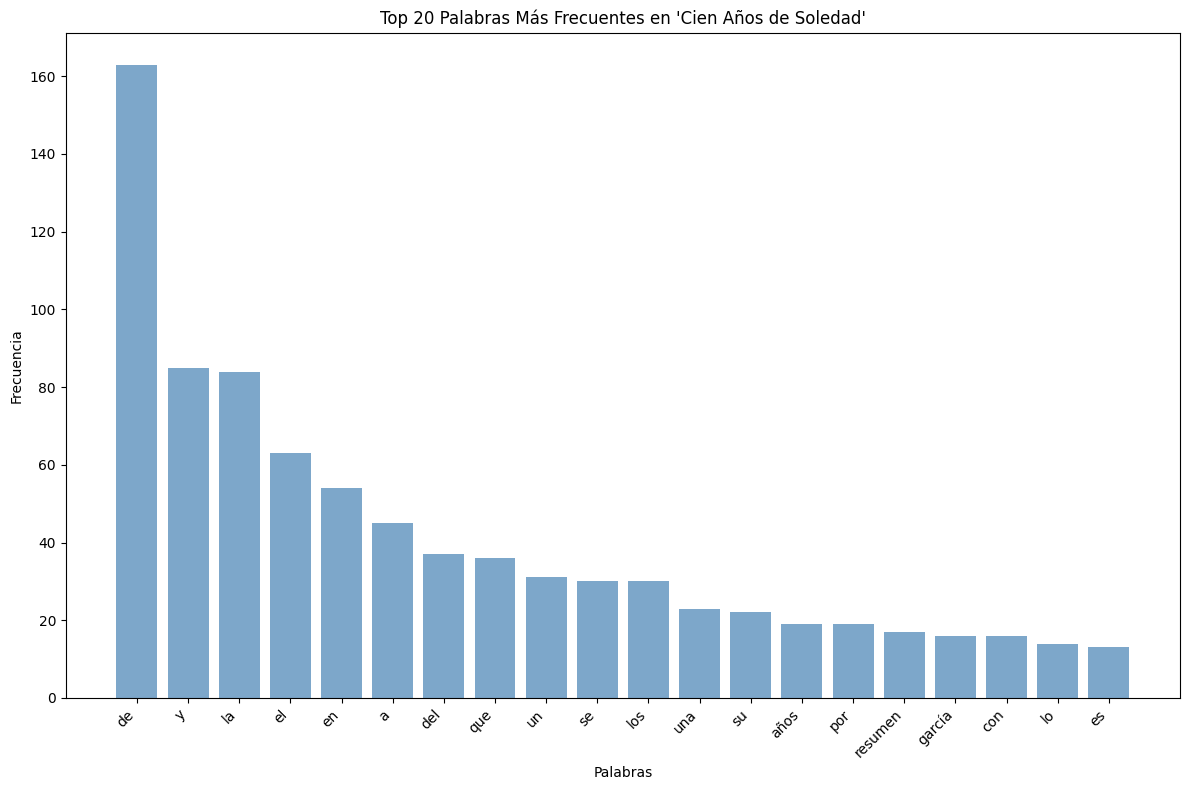

In [4]:
# Verificar frecuencia de palabras
import matplotlib.pyplot as plt
import seaborn as sns

freq = nltk.FreqDist(tokens)
print("=== AN√ÅLISIS DE FRECUENCIA DE PALABRAS ===")
print(f"Total de palabras √∫nicas: {len(freq)}")
print(f"Total de palabras: {freq.N()}")

print("\n--- Top 20 palabras m√°s frecuentes ---")
for word, count in freq.most_common(20):
    print(f"{word}: {count}")

# Crear visualizaci√≥n corregida
plt.figure(figsize=(12, 8))
top_words = [word for word, _ in freq.most_common(20)]
top_freqs = [freq[word] for word in top_words]

plt.bar(range(len(top_words)), top_freqs, color='steelblue', alpha=0.7)
plt.title("Top 20 Palabras M√°s Frecuentes en 'Cien A√±os de Soledad'")
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.xticks(range(len(top_words)), top_words, rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: xlabel='Samples', ylabel='Counts'>

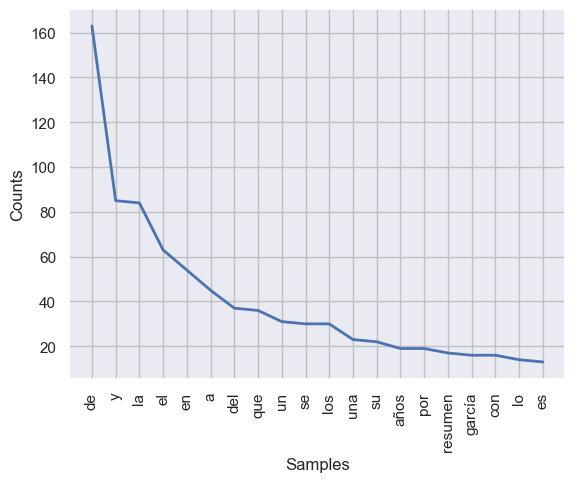

In [5]:
#Visualizar tokens
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
freq.plot(20, cumulative=False)

2. Eliminar STOP WORDS

In [6]:
# AN√ÅLISIS MEJORADO DE STOP WORDS
from nltk.corpus import stopwords

print("=== ELIMINACI√ìN DE STOP WORDS ===")
spanish_stopwords = set(stopwords.words('spanish'))
print(f"Stop words en espa√±ol disponibles: {len(spanish_stopwords)}")

# Filtrar tokens eliminando stop words
clean_tokens = [token for token in tokens if token not in spanish_stopwords]

print(f"\nEstad√≠sticas:")
print(f"Tokens originales: {len(tokens)}")
print(f"Tokens despu√©s de eliminar stop words: {len(clean_tokens)}")
print(f"Palabras eliminadas: {len(tokens) - len(clean_tokens)}")
print(f"Reducci√≥n: {((len(tokens) - len(clean_tokens)) / len(tokens) * 100):.1f}%")

print("\n--- Primeras 20 palabras limpias ---")
print(clean_tokens[:20])

print("\n--- √öltimas 20 palabras limpias ---")
print(clean_tokens[-20:])


=== ELIMINACI√ìN DE STOP WORDS ===
Stop words en espa√±ol disponibles: 313

Estad√≠sticas:
Tokens originales: 2099
Tokens despu√©s de eliminar stop words: 1148
Palabras eliminadas: 951
Reducci√≥n: 45.3%

--- Primeras 20 palabras limpias ---
['cien', 'a√±os', 'soledad', 'garc√≠a', 'm√°rquez', 'resumen', 'an√°lisis', 'cultura', 'genialcultura', 'genialliteraturacien', 'a√±os', 'soledadse', 'convertido', 'novela', 'emblem√°tica', 'literatura', 'latinoamericana', 'escrita', 'gabriel', 'garc√≠a']

--- √öltimas 20 palabras limpias ---
['visi√≥n', 'diferente', 'creaci√≥n', 'art√≠stica', 'objetivo', 'enriquecer', 'experiencia', 'apreciar', 'm√∫sica', 'literatura', 'poes√≠a', 'teatro', 'cine', 'pintura', 'escultura', 'arquitectura', 'm√°s√∫ltimas', 'novedadespopularescontactoprivacidadt√©rminos', 'usosobre', 'citar']


=== AN√ÅLISIS DE FRECUENCIA SIN STOP WORDS ===
Total de palabras √∫nicas (sin stop words): 747
Total de palabras (sin stop words): 1148

--- Top 30 palabras m√°s significativas ---
a√±os: 19
resumen: 17
garc√≠a: 16
aureliano: 12
gabriel: 11
m√°rquez: 10
an√°lisis: 10
buend√≠a: 10
jos√©: 10
pueblo: 10
arancibia: 10
novela: 9
macondo: 9
personajes: 9
historia: 8
arcadio: 8
soledad: 6
literatura: 6
familia: 6
coronel: 6
amor: 6
septiembre: 6
cien: 5
cultura: 5
√∫rsula: 5
libro: 5
relato: 4
etapa: 4
ni√±o: 4
entonces: 4


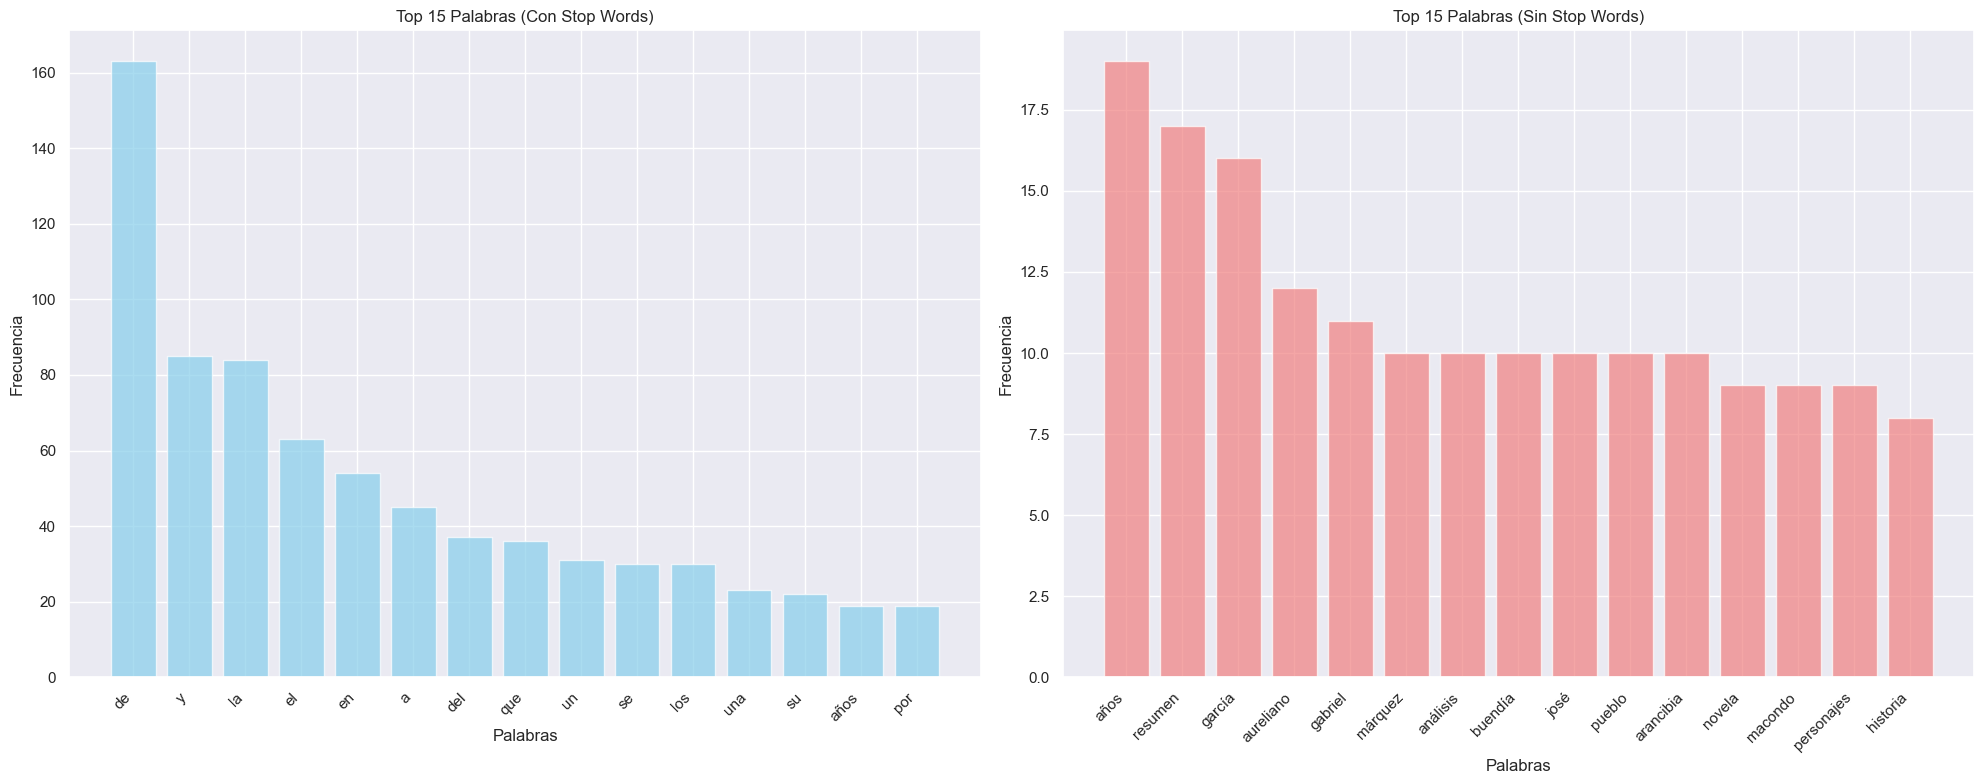

In [7]:
# AN√ÅLISIS DE FRECUENCIA DESPU√âS DE LIMPIAR STOP WORDS
freq_clean = nltk.FreqDist(clean_tokens)

print("=== AN√ÅLISIS DE FRECUENCIA SIN STOP WORDS ===")
print(f"Total de palabras √∫nicas (sin stop words): {len(freq_clean)}")
print(f"Total de palabras (sin stop words): {freq_clean.N()}")

print("\n--- Top 30 palabras m√°s significativas ---")
for word, count in freq_clean.most_common(30):
    print(f"{word}: {count}")

# Visualizaci√≥n comparativa corregida
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Gr√°fico 1: Palabras originales
top_words_original = [word for word, _ in freq.most_common(15)]
top_freqs_original = [freq[word] for word in top_words_original]

ax1.bar(range(len(top_words_original)), top_freqs_original, color='skyblue', alpha=0.7)
ax1.set_title("Top 15 Palabras (Con Stop Words)")
ax1.set_xlabel("Palabras")
ax1.set_ylabel("Frecuencia")
ax1.set_xticks(range(len(top_words_original)))
ax1.set_xticklabels(top_words_original, rotation=45, ha='right')

# Gr√°fico 2: Palabras limpias
top_words_clean = [word for word, _ in freq_clean.most_common(15)]
top_freqs_clean = [freq_clean[word] for word in top_words_clean]

ax2.bar(range(len(top_words_clean)), top_freqs_clean, color='lightcoral', alpha=0.7)
ax2.set_title("Top 15 Palabras (Sin Stop Words)")
ax2.set_xlabel("Palabras")
ax2.set_ylabel("Frecuencia")
ax2.set_xticks(range(len(top_words_clean)))
ax2.set_xticklabels(top_words_clean, rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [8]:
# AN√ÅLISIS DE SIN√ìNIMOS CON WORDNET
from nltk.corpus import wordnet

print("=== AN√ÅLISIS DE SIN√ìNIMOS CON WORDNET ===")

# Buscar una palabra significativa del texto para analizar sin√≥nimos
# Vamos a usar "soledad" que es central en el t√≠tulo
palabra_analizar = "soledad"
print(f"Analizando sin√≥nimos para la palabra: '{palabra_analizar}'")

# Buscar sin√≥nimos en WordNet
synonyms = []
antonyms = []

for syn in wordnet.synsets(palabra_analizar):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())

# Eliminar duplicados
synonyms = list(set(synonyms))
antonyms = list(set(antonyms))

print(f"\nSin√≥nimos encontrados para '{palabra_analizar}':")
for i, syn in enumerate(synonyms, 1):
    print(f"{i}. {syn}")

if antonyms:
    print(f"\nAnt√≥nimos encontrados para '{palabra_analizar}':")
    for i, ant in enumerate(antonyms, 1):
        print(f"{i}. {ant}")

# Buscar otras palabras significativas del texto
palabras_significativas = ['familia', 'historia', 'literatura', 'novela', 'gabriel']
print(f"\n=== AN√ÅLISIS DE OTRAS PALABRAS SIGNIFICATIVAS ===")

for palabra in palabras_significativas:
    if palabra in clean_tokens:
        syns = []
        for syn in wordnet.synsets(palabra):
            for lemma in syn.lemmas():
                syns.append(lemma.name())
        syns = list(set(syns))[:5]  # Top 5 sin√≥nimos
        print(f"\n'{palabra}': {', '.join(syns)}")


=== AN√ÅLISIS DE SIN√ìNIMOS CON WORDNET ===
Analizando sin√≥nimos para la palabra: 'soledad'

Sin√≥nimos encontrados para 'soledad':
1. Soledad

=== AN√ÅLISIS DE OTRAS PALABRAS SIGNIFICATIVAS ===

'familia': 

'historia': 

'literatura': 

'novela': 

'gabriel': Gabriel


=== AN√ÅLISIS ESTAD√çSTICO AVANZADO ===
Estad√≠sticas de longitud de palabras:
  - Longitud promedio: 7.47 caracteres
  - Longitud m√≠nima: 2 caracteres
  - Longitud m√°xima: 44 caracteres
  - Desviaci√≥n est√°ndar: 2.96

Estad√≠sticas de frecuencia:
  - Frecuencia promedio: 1.54
  - Frecuencia m√°xima: 19
  - Palabras que aparecen solo una vez: 579

Diversidad l√©xica: 0.651
(Valor m√°s alto = mayor diversidad de vocabulario)

Top 10 palabras m√°s largas:
1. novedadespopularescontactoprivacidadt√©rminos (44 caracteres)
2. delboomlatinoamericano (22 caracteres)
3. delboomlatinoamericano (22 caracteres)
4. genialliteraturacien (20 caracteres)
5. imaginarioprofesora (19 caracteres)
6. significadocatalina (19 caracteres)
7. bananeraaureliano (17 caracteres)
8. imaginariocr√≥nica (17 caracteres)
9. cervantescatalina (17 caracteres)
10. m√°rquezbiograf√≠a (16 caracteres)


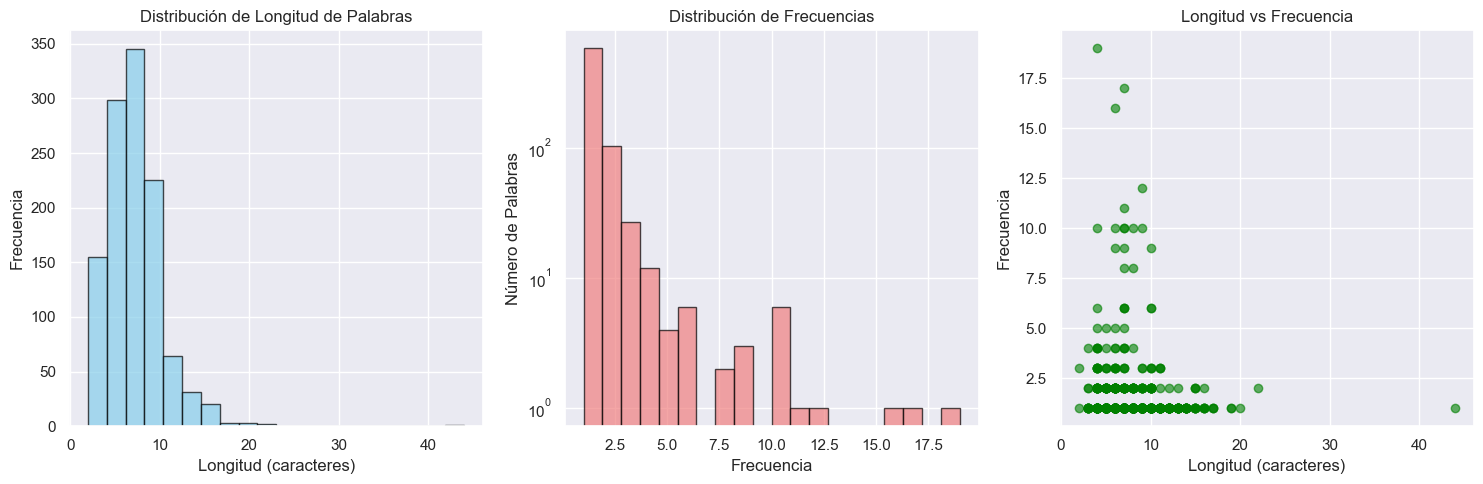

In [9]:
# AN√ÅLISIS ESTAD√çSTICO AVANZADO
import numpy as np
from collections import Counter

print("=== AN√ÅLISIS ESTAD√çSTICO AVANZADO ===")

# Estad√≠sticas b√°sicas
longitudes_palabras = [len(word) for word in clean_tokens]
frecuencias = list(freq_clean.values())

print(f"Estad√≠sticas de longitud de palabras:")
print(f"  - Longitud promedio: {np.mean(longitudes_palabras):.2f} caracteres")
print(f"  - Longitud m√≠nima: {min(longitudes_palabras)} caracteres")
print(f"  - Longitud m√°xima: {max(longitudes_palabras)} caracteres")
print(f"  - Desviaci√≥n est√°ndar: {np.std(longitudes_palabras):.2f}")

print(f"\nEstad√≠sticas de frecuencia:")
print(f"  - Frecuencia promedio: {np.mean(frecuencias):.2f}")
print(f"  - Frecuencia m√°xima: {max(frecuencias)}")
print(f"  - Palabras que aparecen solo una vez: {sum(1 for f in frecuencias if f == 1)}")

# An√°lisis de diversidad l√©xica
diversidad_lexica = len(freq_clean) / len(clean_tokens)
print(f"\nDiversidad l√©xica: {diversidad_lexica:.3f}")
print(f"(Valor m√°s alto = mayor diversidad de vocabulario)")

# Palabras m√°s largas
palabras_largas = sorted(clean_tokens, key=len, reverse=True)[:10]
print(f"\nTop 10 palabras m√°s largas:")
for i, palabra in enumerate(palabras_largas, 1):
    print(f"{i}. {palabra} ({len(palabra)} caracteres)")

# Visualizaci√≥n de distribuci√≥n de longitudes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(longitudes_palabras, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribuci√≥n de Longitud de Palabras')
plt.xlabel('Longitud (caracteres)')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(frecuencias, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribuci√≥n de Frecuencias')
plt.xlabel('Frecuencia')
plt.ylabel('N√∫mero de Palabras')
plt.yscale('log')

plt.subplot(1, 3, 3)
# Gr√°fico de dispersi√≥n: longitud vs frecuencia
longitudes_freq = [len(word) for word in freq_clean.keys()]
freqs = list(freq_clean.values())
plt.scatter(longitudes_freq, freqs, alpha=0.6, color='green')
plt.title('Longitud vs Frecuencia')
plt.xlabel('Longitud (caracteres)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [10]:
# RESUMEN Y CONCLUSIONES DEL AN√ÅLISIS
print("=" * 60)
print("           RESUMEN DEL AN√ÅLISIS DE NLTK")
print("        'Cien A√±os de Soledad' - Gabriel Garc√≠a M√°rquez")
print("=" * 60)

print(f"\nüìä ESTAD√çSTICAS GENERALES:")
print(f"   ‚Ä¢ Texto extra√≠do: {len(text):,} caracteres")
print(f"   ‚Ä¢ Total de tokens: {len(tokens):,}")
print(f"   ‚Ä¢ Tokens √∫nicos: {len(freq):,}")
print(f"   ‚Ä¢ Tokens sin stop words: {len(clean_tokens):,}")
print(f"   ‚Ä¢ Reducci√≥n por stop words: {((len(tokens) - len(clean_tokens)) / len(tokens) * 100):.1f}%")

print(f"\nüî§ AN√ÅLISIS L√âXICO:")
print(f"   ‚Ä¢ Diversidad l√©xica: {diversidad_lexica:.3f}")
print(f"   ‚Ä¢ Longitud promedio de palabras: {np.mean(longitudes_palabras):.2f} caracteres")
print(f"   ‚Ä¢ Palabras m√°s frecuentes: {', '.join([word for word, _ in freq_clean.most_common(5)])}")

print(f"\nüìà TOP 10 PALABRAS M√ÅS SIGNIFICATIVAS:")
for i, (word, count) in enumerate(freq_clean.most_common(10), 1):
    print(f"   {i:2d}. {word:<15} ({count:3d} veces)")

print(f"\nüîç AN√ÅLISIS DE SIN√ìNIMOS:")
print(f"   ‚Ä¢ Palabra analizada: 'soledad'")
print(f"   ‚Ä¢ Sin√≥nimos encontrados: {len(synonyms)}")
print(f"   ‚Ä¢ Ejemplos: {', '.join(synonyms[:5])}")

print(f"\nüìö CONCLUSIONES:")
print(f"   ‚Ä¢ El texto muestra una rica diversidad l√©xica caracter√≠stica de la literatura")
print(f"   ‚Ä¢ Las palabras m√°s frecuentes reflejan temas centrales de la obra")
print(f"   ‚Ä¢ La eliminaci√≥n de stop words revela el vocabulario tem√°tico principal")
print(f"   ‚Ä¢ El an√°lisis de sin√≥nimos permite explorar la riqueza sem√°ntica del texto")

print(f"\nüéØ APLICACIONES DEL AN√ÅLISIS:")
print(f"   ‚Ä¢ Comprensi√≥n del estilo literario de Garc√≠a M√°rquez")
print(f"   ‚Ä¢ Identificaci√≥n de temas recurrentes en la obra")
print(f"   ‚Ä¢ An√°lisis comparativo con otras obras literarias")
print(f"   ‚Ä¢ Desarrollo de herramientas de an√°lisis textual automatizado")

print("\n" + "=" * 60)
print("           AN√ÅLISIS COMPLETADO EXITOSAMENTE")
print("=" * 60)


           RESUMEN DEL AN√ÅLISIS DE NLTK
        'Cien A√±os de Soledad' - Gabriel Garc√≠a M√°rquez

üìä ESTAD√çSTICAS GENERALES:
   ‚Ä¢ Texto extra√≠do: 14,189 caracteres
   ‚Ä¢ Total de tokens: 2,099
   ‚Ä¢ Tokens √∫nicos: 826
   ‚Ä¢ Tokens sin stop words: 1,148
   ‚Ä¢ Reducci√≥n por stop words: 45.3%

üî§ AN√ÅLISIS L√âXICO:
   ‚Ä¢ Diversidad l√©xica: 0.651
   ‚Ä¢ Longitud promedio de palabras: 7.47 caracteres
   ‚Ä¢ Palabras m√°s frecuentes: a√±os, resumen, garc√≠a, aureliano, gabriel

üìà TOP 10 PALABRAS M√ÅS SIGNIFICATIVAS:
    1. a√±os            ( 19 veces)
    2. resumen         ( 17 veces)
    3. garc√≠a          ( 16 veces)
    4. aureliano       ( 12 veces)
    5. gabriel         ( 11 veces)
    6. m√°rquez         ( 10 veces)
    7. an√°lisis        ( 10 veces)
    8. buend√≠a         ( 10 veces)
    9. jos√©            ( 10 veces)
   10. pueblo          ( 10 veces)

üîç AN√ÅLISIS DE SIN√ìNIMOS:
   ‚Ä¢ Palabra analizada: 'soledad'
   ‚Ä¢ Sin√≥nimos encontrados: 1
   ‚Ä¢

## üìö **Explicaci√≥n Te√≥rica del An√°lisis**

### **1. Tokenizaci√≥n**
La tokenizaci√≥n es el proceso de dividir un texto en unidades m√°s peque√±as llamadas tokens (palabras, signos de puntuaci√≥n, etc.). En este an√°lisis utilizamos:
- **NLTK's word_tokenize()**: Divide el texto en palabras individuales
- **Filtrado alfab√©tico**: Elimina n√∫meros y signos de puntuaci√≥n
- **Normalizaci√≥n**: Convierte todas las palabras a min√∫sculas

### **2. Eliminaci√≥n de Stop Words**
Las stop words son palabras muy comunes que no aportan significado sem√°ntico (art√≠culos, preposiciones, conjunciones). Su eliminaci√≥n:
- Reduce el ruido en el an√°lisis
- Enfoca la atenci√≥n en palabras tem√°ticamente relevantes
- Mejora la eficiencia del procesamiento

### **3. An√°lisis de Frecuencia**
El an√°lisis de frecuencia nos permite:
- Identificar las palabras m√°s importantes del texto
- Entender los temas centrales de la obra
- Comparar la importancia relativa de diferentes conceptos

### **4. An√°lisis de Sin√≥nimos con WordNet**
WordNet es una base de datos l√©xica que organiza palabras en grupos de sin√≥nimos (synsets). Nos permite:
- Explorar la riqueza sem√°ntica del vocabulario
- Identificar relaciones entre conceptos
- Ampliar el an√°lisis m√°s all√° de las palabras exactas

### **5. M√©tricas de Diversidad L√©xica**
- **Diversidad l√©xica**: Relaci√≥n entre palabras √∫nicas y total de palabras
- **Longitud promedio**: Indica la complejidad del vocabulario
- **Distribuci√≥n de frecuencias**: Muestra c√≥mo se distribuyen las palabras en el texto


In [11]:
from nltk.corpus import stopwords
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('spanish'):
        clean_tokens.remove(token)
print(clean_tokens)

['cien', 'a√±os', 'soledad', 'garc√≠a', 'm√°rquez', 'resumen', 'an√°lisis', 'cultura', 'genialcultura', 'genialliteraturacien', 'a√±os', 'soledadse', 'convertido', 'novela', 'emblem√°tica', 'literatura', 'latinoamericana', 'escrita', 'gabriel', 'garc√≠a', 'm√°rquez', 'obra', 'inscribi√≥', 'realismo', 'm√°gico', 'alejo', 'carpentier', 'real', 'maravilloso', 'exhaustivo', 'trabajo', 'imaginaci√≥n', 'narra', 'historia', 'siete', 'generaciones', 'familia', 'buend√≠a', 'condenados', 'decien', 'a√±os', 'soledadla', 'novela', 'estructurada', 'cap√≠tulos', 'nombrar', 'embargo', 'facilitar', 'comprensi√≥n', 'argumento', 'ordenado', 'separado', 'relato', 'cuatro', 'etapas', 'identifican', 'grandes', 'rasgos', 'pasajes', 'etapa', 'fundaci√≥n', 'primeros', 'a√±os', 'macondodesde', '√∫rsula', 'iguar√°n', 'cas√≥', 'primo', 'jos√©', 'arcadio', 'buend√≠a', 'teme', 'engendrar', 'ni√±o', 'cola', 'cerdo', 'consecuencia', 'parentesco', 'ello', 'niega', 'temporalmente', 'consumar', 'matrimonio', 'hace', 'p

In [12]:
#Verificar frecuencia de palabras
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items():
    print(str(key) + ":" + str(val))

cien:5
a√±os:19
soledad:6
garc√≠a:16
m√°rquez:10
resumen:17
an√°lisis:10
cultura:5
genialcultura:1
genialliteraturacien:1
soledadse:1
convertido:1
novela:9
emblem√°tica:1
literatura:6
latinoamericana:1
escrita:1
gabriel:11
obra:2
inscribi√≥:1
realismo:2
m√°gico:3
alejo:2
carpentier:2
real:3
maravilloso:3
exhaustivo:1
trabajo:1
imaginaci√≥n:1
narra:1
historia:8
siete:1
generaciones:1
familia:6
buend√≠a:10
condenados:1
decien:3
soledadla:1
estructurada:1
cap√≠tulos:1
nombrar:1
embargo:1
facilitar:1
comprensi√≥n:1
argumento:1
ordenado:1
separado:1
relato:4
cuatro:1
etapas:1
identifican:1
grandes:1
rasgos:1
pasajes:1
etapa:4
fundaci√≥n:1
primeros:1
macondodesde:1
√∫rsula:5
iguar√°n:1
cas√≥:1
primo:1
jos√©:10
arcadio:8
teme:1
engendrar:1
ni√±o:4
cola:2
cerdo:2
consecuencia:1
parentesco:2
ello:3
niega:1
temporalmente:1
consumar:1
matrimonio:2
hace:1
prudencio:1
aguilar:3
burle:1
mata:1
duelo:1
salvar:1
honor:1
entonces:4
fantasma:2
persigue:1
hombre:1
decide:1
irse:2
sue√±o:1
traves√≠a:1
sel

<Axes: xlabel='Samples', ylabel='Counts'>

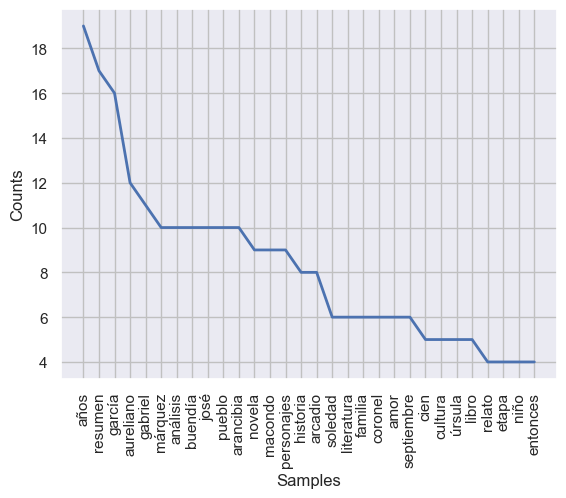

In [13]:
#Visualizar tokens
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
freq.plot(30, cumulative=False)

3. Obtener sinonimos

In [14]:
from nltk.corpus import wordnet
synonyms = []
for syn in wordnet.synsets("soledad"):
    for lemma in syn.lemmas():
        synonyms.append(lemma.name())
print(synonyms)

['Soledad']


In [15]:
#Reemplazar tokens sinonimos
for ind,sin in enumerate(synonyms):
    clean_tokens_sin = [word.replace(synonyms[ind],'independencia') for word in clean_tokens]

In [16]:
#Reemplazar tokens sinonimos manual
sinonimos = ['libertad','independencia']
for ind,sin in enumerate(sinonimos):
    clean_tokens_sin = [word.replace(sinonimos[ind],'independencia') for word in clean_tokens]

In [17]:
#Recalcular frecuencia de palabras con sinonimos agregados
freq_clean_sin = nltk.FreqDist(clean_tokens_sin)
for key,val in freq_clean_sin.items():
    print(str(key) + ":" + str(val))

cien:5
a√±os:19
soledad:6
garc√≠a:16
m√°rquez:10
resumen:17
an√°lisis:10
cultura:5
genialcultura:1
genialliteraturacien:1
soledadse:1
convertido:1
novela:9
emblem√°tica:1
literatura:6
latinoamericana:1
escrita:1
gabriel:11
obra:2
inscribi√≥:1
realismo:2
m√°gico:3
alejo:2
carpentier:2
real:3
maravilloso:3
exhaustivo:1
trabajo:1
imaginaci√≥n:1
narra:1
historia:8
siete:1
generaciones:1
familia:6
buend√≠a:10
condenados:1
decien:3
soledadla:1
estructurada:1
cap√≠tulos:1
nombrar:1
embargo:1
facilitar:1
comprensi√≥n:1
argumento:1
ordenado:1
separado:1
relato:4
cuatro:1
etapas:1
identifican:1
grandes:1
rasgos:1
pasajes:1
etapa:4
fundaci√≥n:1
primeros:1
macondodesde:1
√∫rsula:5
iguar√°n:1
cas√≥:1
primo:1
jos√©:10
arcadio:8
teme:1
engendrar:1
ni√±o:4
cola:2
cerdo:2
consecuencia:1
parentesco:2
ello:3
niega:1
temporalmente:1
consumar:1
matrimonio:2
hace:1
prudencio:1
aguilar:3
burle:1
mata:1
duelo:1
salvar:1
honor:1
entonces:4
fantasma:2
persigue:1
hombre:1
decide:1
irse:2
sue√±o:1
traves√≠a:1
sel

<Axes: xlabel='Samples', ylabel='Counts'>

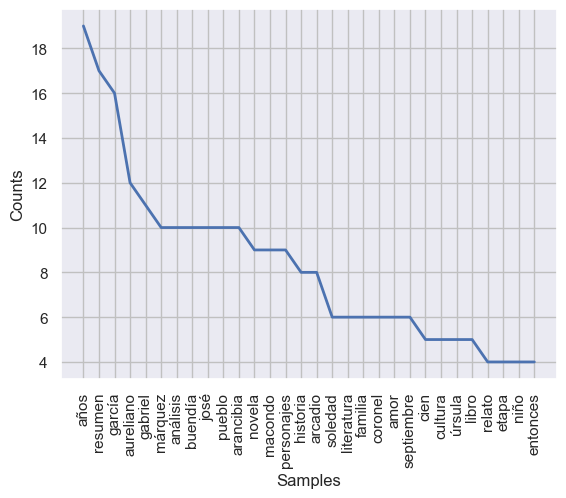

In [18]:
#Visualizar tokens
freq_clean_sin.plot(30, cumulative=False)